# Import Libraries

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader, Dataset
import cv2
from scipy.fftpack import fft2
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import os
import cv2
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from tqdm import tqdm
import torch.nn.functional as F
import wandb
import matplotlib.pyplot as plt
from skimage import io
from torchvision import transforms
import dlib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colorbar as cbar
import os
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import StratifiedShuffleSplit
import scipy.special
import PIL.Image as Image
import dlib
from utils import *

In [6]:
learning_rate = 1e-06
hidden_dims = [128, 64, 32]
dropout = 0.1
leaky_relu = 0.4
attention_model = AttentionMechanism2().to(device)
ffn_model = create_ffn(input_dim=229376,hidden_dims=hidden_dims, dropout=dropout, leaky_relu=leaky_relu).to(device)
optimizer = torch.optim.AdamW(list(attention_model.parameters()) + list(ffn_model.parameters()), lr=learning_rate, weight_decay=1e-4)

In [7]:
attention, ffn, optimizer= load_model(attention_model, ffn_model, optimizer,"model/best_model0.8138.pth")

Model loaded from model/best_model0.8138.pth


Precomputing Features: 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

Features saved to Test/features


tensor([[0.6855, 0.3145]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted Label: Inpainted
Confidence Score: 0.6854676604270935


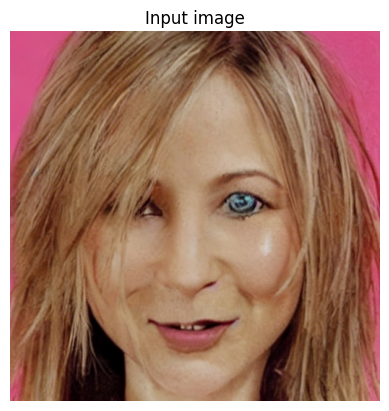

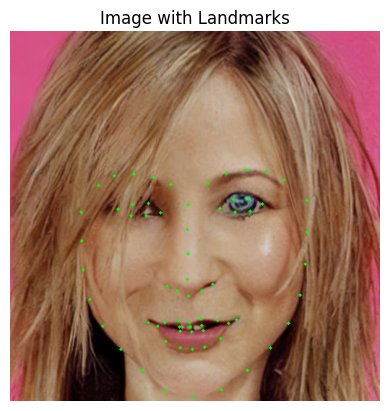

Region 1: chin_hsv_V, Score: 0.056903474032878876
Region 2: chin_min_filter, Score: 0.047302212566137314
Region 3: chin_ycbcr_Y, Score: 0.04464041441679001
Classified as: Inpainted
Chin has inconsistency hsv_V
Chin has inconsistency min_filter
Chin has inconsistency ycbcr_Y


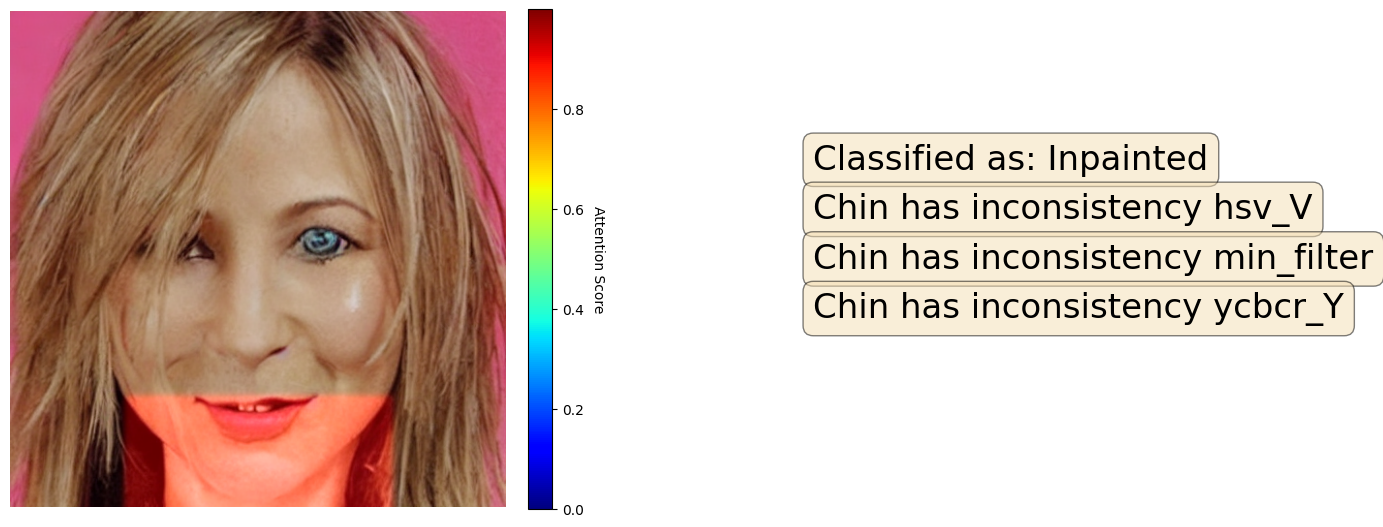

In [8]:
###########features combined region attention map generation
# !rm /data/celebA_files/single/test/*
# /data/Tell-Me-Where-It-Fakes/map_out_sing_att_sel/29477_right_eye_mouth_chin_inpainted.pngoutput_image.png
# !cp /data/celebainpainted_full_3regions_v3/inpainted/29477_right_eye_mouth_chin_inpainted.png /data/celebA_files/single/test
# !cp /data/celebainpainted_full_3regions_v3/inpainted/28743_right_eye_left_eye_mouth_inpainted.png /data/celebA_files/single/test
# !cp /data/celebAHQ512_inpaint/real/19178.jpg /data/celebA_files/single/test

feat_tensors_r, attended, attended_region_feature, attention_scores, attn_weights, feature_importance, prob_score, test_feature_loader = gen_outputs_region(attention,ffn)




# !rm /data/celebA_files/single/test/*